In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

____
## Basic Facts About The Data
We will look at the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


____
## Exploratory Data Analysis

The goal is to build a model that can predict the species of an Iris based on its features. Let's get a sense of how separable the data is based on the species.

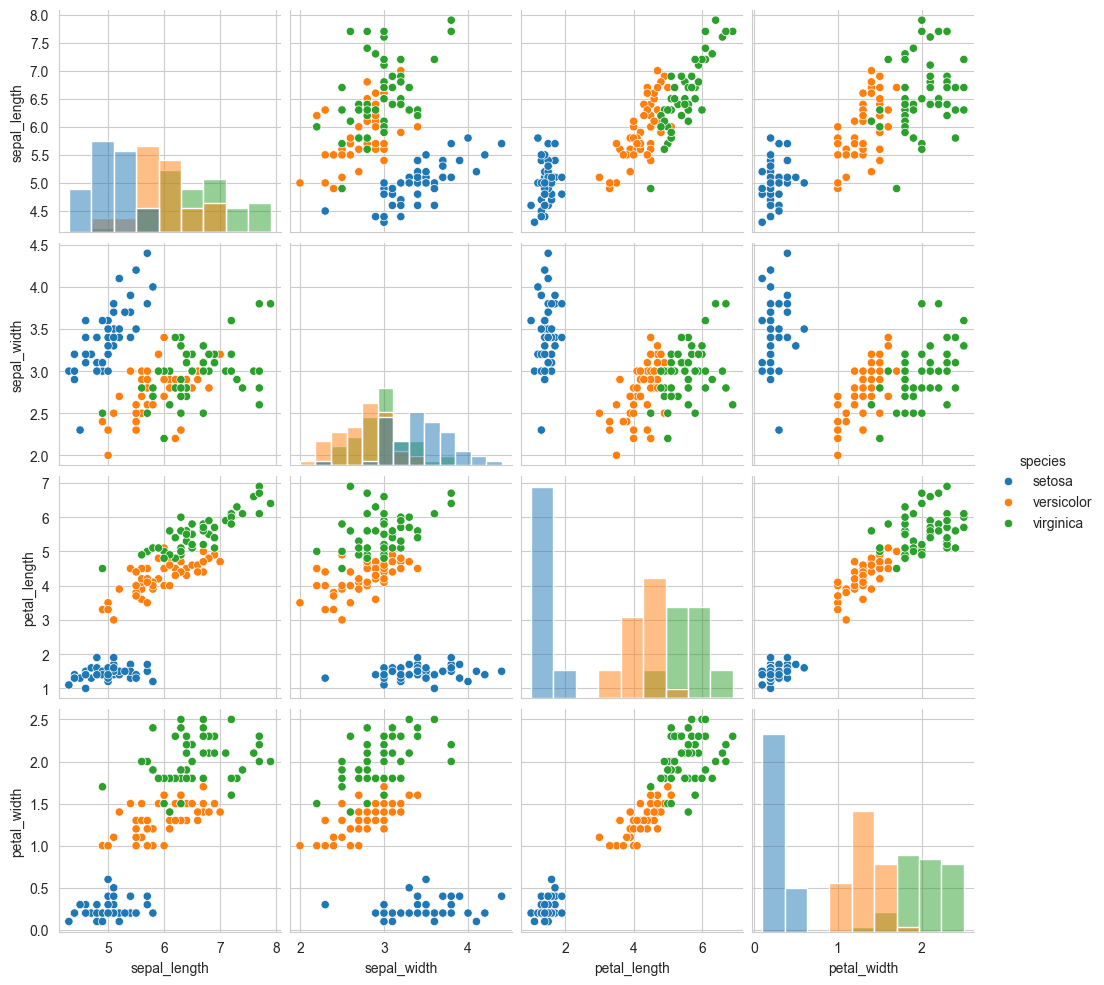

In [9]:
sns.pairplot(data=iris, hue='species', diag_kind='hist')

It looks like setosa is the most separable species, but clearly the other two are pretty separable as well. Setosa is special in some other ways as well, as its features do not correlate with one another in the same ways that the other two species' do. For example, **sepal_length** does not seem to depend much on **petal_length** for setosa, whereas there's a linear relationship between them for the other two species.

The two features of setosa that do correlate are **sepal_length** and **sepal_width**. So, let's look at the density plot for their relationship.

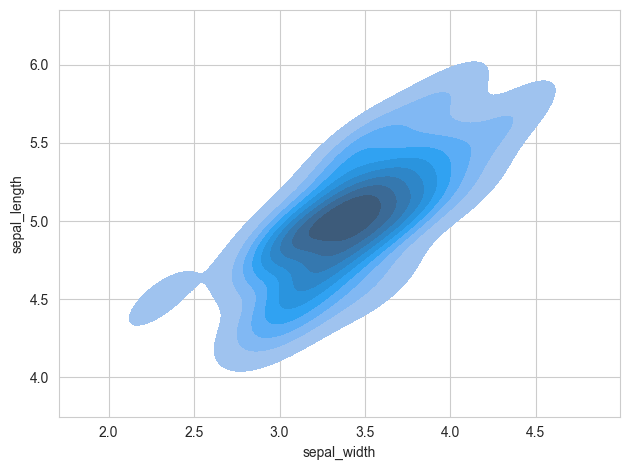

In [15]:
sns.kdeplot(data=iris[iris['species']=='setosa'], x='sepal_width', y='sepal_length', fill=True)
plt.tight_layout()

In [16]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [22]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

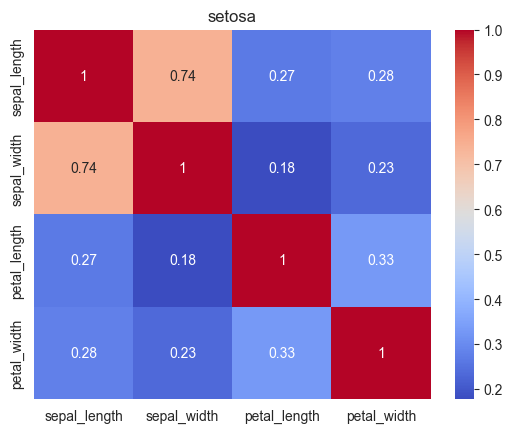

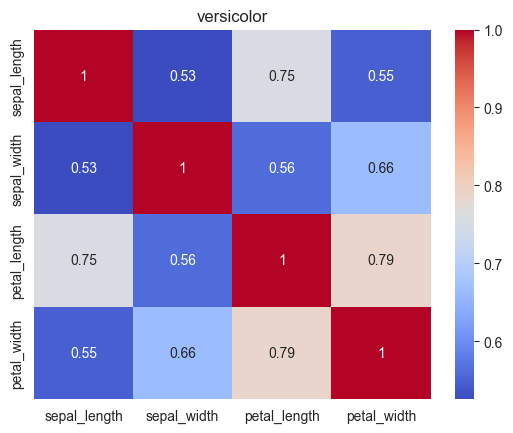

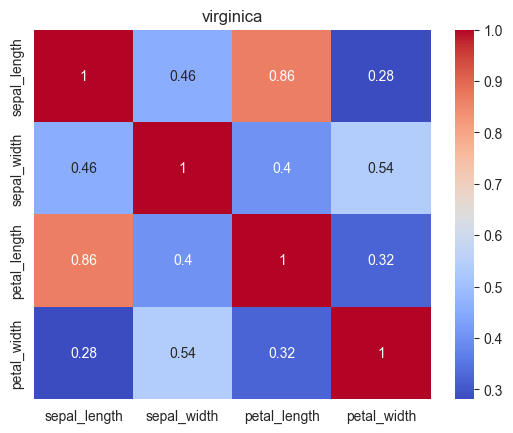

In [26]:
for sp in iris['species'].unique():
    plt.figure()
    sns.heatmap(iris[iris['species']==sp].corr(numeric_only=True), cmap='coolwarm', annot=True)
    plt.title(sp)
    plt.show()

____
## Preparing Data

There is no real feature engineering that needs to be done (besides scaling), so we only need to split the data into training and test sets.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.preprocessing import LabelEncoder

In [28]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

____
## Training The Model

We're going to naively train/fit the SVC and see how it does. Then we'll try to optimize the hyper-parameters if we need to. Because the data is so simple, let's compare the results of fitting the scaled and unscaled data.

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

In [35]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)

SVC()

____
## Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
predictions = model.predict(X_test_scaled)

In [38]:
print('Classification Report (Scaled): \n', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix (Scaled): \n', confusion_matrix(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Confusion Matrix: 
 [[17  0  0]
 [ 0 13  0]
 [ 0  0 15]]


In [40]:
predictions_unscaled = model_unscaled.predict(X_test)
print('Classification Report (Unscaled): \n', classification_report(y_test, predictions_unscaled))
print('\n')
print('Confusion Matrix (Unscaled): \n', confusion_matrix(y_test, predictions_unscaled))

Classification Report (Unscaled): 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Confusion Matrix (Unscaled): 
 [[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


Remarkably, the model fitted to the scaled data performed perfectly. The model fitted with the unscaled data performed very well also (but not perfectly).

____
## Gridsearch Practice

We do not need to optimize the hyper-parameters of the model because just scaling the data allowed the model to be perfect (at least as far as we know from the data we have). Nevertheless, let's see how close we can get the 'unscaled model' by performing a grid search, since SVMs are particularly amenable to it.

In [41]:
from sklearn.model_selection import GridSearchCV

We'll create a dictionary that specifies the parameter grid that we'll search over.

In [42]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [43]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose = 3)

In [44]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.381 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
grid_predictions = grid.predict(X_test)

In [46]:
print('Classification Report (Grid): \n', classification_report(y_test, grid_predictions))
print('\n')
print('Confusion Matrix (Grid): \n', confusion_matrix(y_test, grid_predictions))

Classification Report (Grid): 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Confusion Matrix (Grid): 
 [[17  0  0]
 [ 0 13  0]
 [ 0  0 15]]


____
## Conclusion

We managed to construct models fitted on both scaled and unscaled data that behave perfectly. This is pretty suspicious, since even though the data is pretty simple it is also noisy. This suggests that the model may have been overfit in both instances. It would require some more data in order to determine this.